<a href="https://colab.research.google.com/github/lingesh0/Handwritten-Digit-Recognition-CNN-using-TensorFlow-/blob/main/Deep_Learning_Project_Handwritten_Digit_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 32s 36ms/step - accuracy: 0.8564 - loss: 0.4645 - val_accuracy: 0.9843 - val_loss: 0.0517
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 39s 33ms/step - accuracy: 0.9774 - loss: 0.0724 - val_accuracy: 0.9870 - val_loss: 0.0418
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 29s 35ms/step - accuracy: 0.9844 - loss: 0.0508 - val_accuracy: 0.9897 - val_loss: 0.0377
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 39s 32ms/step - accuracy: 0.9877 - loss: 0.0383 - val_accuracy: 0.9910 - val_loss: 0.0328
Epoch 5/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 40s 31ms/step - accuracy: 0.9896 - loss: 0.0347 - val_accuracy: 0.9908 - val_loss: 0.0336
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9873 - loss: 0.0346
🔥 Test Accuracy: 0.9901999831199646


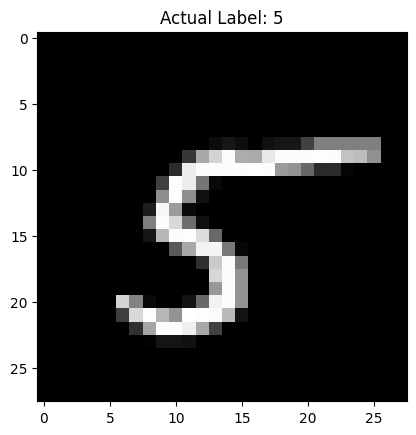

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
Predicted Label: 5


In [1]:
#  Deep Learning CNN - Handwritten Digit Recognition (MNIST)

import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Load dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Reshape and normalize
X_train = X_train.reshape(-1, 28, 28, 1) / 255.0
X_test  = X_test.reshape(-1, 28, 28, 1) / 255.0

# One-hot encoding
y_train = to_categorical(y_train, 10)
y_test  = to_categorical(y_test, 10)

# Build CNN model
model = Sequential([
    Conv2D(32, (3,3), activation="relu", input_shape=(28,28,1)),
    MaxPooling2D((2,2)),

    Conv2D(64, (3,3), activation="relu"),
    MaxPooling2D((2,2)),

    Flatten(),
    Dense(128, activation="relu"),
    Dropout(0.3),
    Dense(10, activation="softmax")
])

# Compile
model.compile(optimizer="adam",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

# Train
history = model.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.1)

# Evaluate
test_loss, test_acc = model.evaluate(X_test, y_test)
print(" Test Accuracy:", test_acc)

# Predict a random image
import numpy as np
import matplotlib.pyplot as plt

index = np.random.randint(0, X_test.shape[0])
sample = X_test[index].reshape(1, 28, 28, 1)

plt.imshow(X_test[index].reshape(28,28), cmap="gray")
plt.title("Actual Label: {}".format(np.argmax(y_test[index])))
plt.show()

pred = model.predict(sample)
print("Predicted Label:", np.argmax(pred))
